In [2]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib notebook

In [76]:
def G_mat_to_tau_better(mats, Gmat_real, Gmat_imag, beta, ntau):
    n_tau=ntau
    taus = np.linspace(0.,beta,n_tau)
    n_mat = len(Gmat_real)
    iomega_n = 1j*(2*np.arange(0, n_mat)+1)*np.pi/beta
    Gtau = np.zeros(n_tau)
    Gmat = Gmat_real+1j*Gmat_imag
    for i in range(0, n_tau):
        tau = taus[i]
        Gtau[i] = (2./beta)*np.sum(np.exp(-iomega_n*tau)*(Gmat - 1./iomega_n)).real
      
    return (taus, Gtau-0.5)

def G_mat_to_tau_better_calc_coeff(mats, Gmat_real, Gmat_imag, beta, ntau):
    n_tau=ntau
    a1 = -Gmat_imag[-1]*mats[-1]
    print("a1=",a1)
    taus = np.linspace(0.,beta,n_tau)
    n_mat = len(Gmat_real)
    iomega_n = 1j*(2*np.arange(0, n_mat)+1)*np.pi/beta
    Gtau = np.zeros(n_tau)
    Gmat = Gmat_real+1j*Gmat_imag
    for i in range(0, n_tau):
        tau = taus[i]
        Gtau[i] = (2./beta)*np.sum(np.exp(-iomega_n*tau)*(Gmat - a1/iomega_n)).real
      
    return (taus, Gtau-a1/2.)

def G_tau_to_mat_naive(taus, Gtau, beta, n_mat):
    mats = (2*np.arange(0, n_mat)+1)*np.pi/beta
    dt = taus[1]-taus[0]
    
    Gmat = np.zeros(n_mat, dtype=complex)
    
    for i in range(0, n_mat):
        Gmat[i] = dt*np.sum(np.exp(1j*mats[i]*taus)*Gtau)
    
    return (mats, Gmat.real, Gmat.imag)

In [77]:
%ls

G_omega_9  G_tau_9  MatsubaraTauTransformer.ipynb  selfenergy_9


In [78]:
G_omega = np.loadtxt("G_omega_9")
G_tau = np.loadtxt("G_tau_9")
SE_omega = np.loadtxt("selfenergy_9")

print("G omega shape = ", G_omega.shape)
print("G tau shape = ", G_tau.shape)
print("SE omega shape = ", SE_omega.shape)

G omega shape =  (1024, 5)
G tau shape =  (1025, 3)
SE omega shape =  (1024, 5)


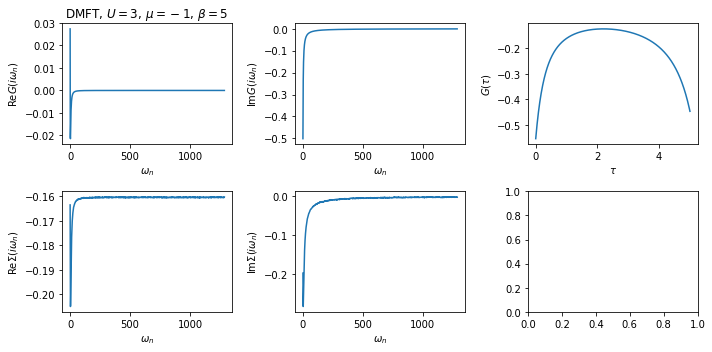

In [79]:
fig, axs = plt.subplots(2,3, figsize=(10,5))

axs[0,0].set_title(r'DMFT, $U=3$, $\mu=-1$, $\beta=5$')
axs[0,0].plot(G_omega[:,0], G_omega[:,1])
axs[0,0].set_ylabel(r'Re$G(i\omega_n)$')
axs[0,0].set_xlabel(r'$\omega_n$')
axs[0,1].plot(G_omega[:,0], G_omega[:,2])
axs[0,1].set_ylabel(r'Im$G(i\omega_n)$')
axs[0,1].set_xlabel(r'$\omega_n$')
axs[0,2].plot(G_tau[:,0], G_tau[:,1])
axs[0,2].set_ylabel(r'$G(\tau)$')
axs[0,2].set_xlabel(r'$\tau$')
axs[1,0].plot(SE_omega[:,0], SE_omega[:,1])
axs[1,0].set_ylabel(r'Re$\Sigma(i\omega_n)$')
axs[1,0].set_xlabel(r'$\omega_n$')
axs[1,1].plot(SE_omega[:,0], SE_omega[:,2])
axs[1,1].set_ylabel(r'Im$\Sigma(i\omega_n)$')
axs[1,1].set_xlabel(r'$\omega_n$')

plt.tight_layout()
plt.show()

# Transform G

Beta= 4.999999999999989
a1= 0.9999956404756231


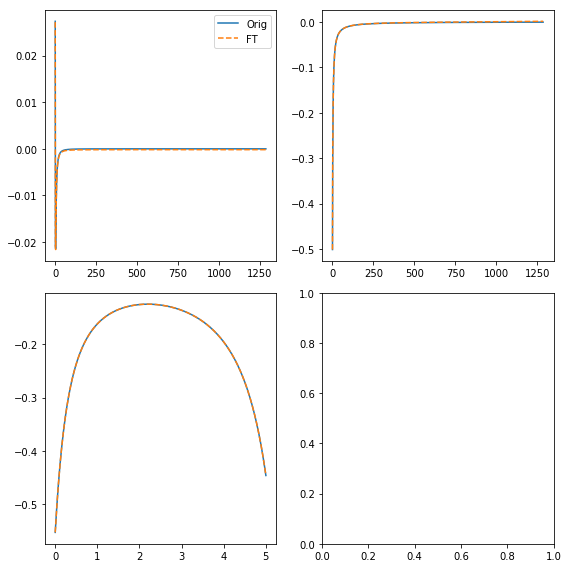

In [80]:
mats = G_omega[:,0]
G_omega_real = G_omega[:,1]
G_omega_imag = G_omega[:,2]
beta = np.pi/mats[0]
print("Beta=",beta)

(taus, G_tau_FT) = G_mat_to_tau_better_calc_coeff(mats, G_omega_real, G_omega_imag, beta, ntau=1500)
#(mats_new, G_omega_real_new, G_omega_imag_new) = G_tau_to_mat_naive(G_tau[:,0], G_tau[:,1], beta, len(mats))
(mats_new, G_omega_real_new, G_omega_imag_new) = G_tau_to_mat_naive(taus, G_tau_FT, beta, len(mats))

fig, axs = plt.subplots(2,2, figsize=(8,8))
axs[0,0].plot(mats, G_omega_real, label='Orig')
axs[0,0].plot(mats_new, G_omega_real_new,'--', label='FT')
axs[0,0].legend()

axs[0,1].plot(mats, G_omega_imag, label='Orig')
axs[0,1].plot(mats_new, G_omega_imag_new,'--', label='FT')

axs[1,0].plot(G_tau[:,0], G_tau[:,1], label="FT")
axs[1,0].plot(taus, G_tau_FT, '--', label="FT")

plt.tight_layout()
plt.show()

# Transform $\Sigma$

Re SE Constant =  -0.16034665076405
a1= 2.146710361627623


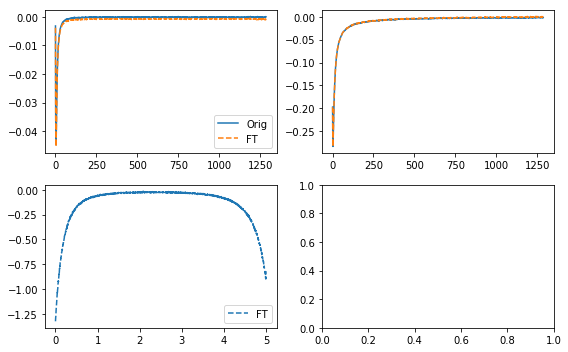

In [81]:
mats = SE_omega[:,0]
SE_omega_real = SE_omega[:,1]
SE_omega_imag = SE_omega[:,2]
beta = np.pi/mats[0]

SE_constant = SE_omega_real[-1]
print("Re SE Constant = ",SE_constant)
SE_omega_real_adjusted = SE_omega_real - SE_constant

(taus, SE_tau_FT) = G_mat_to_tau_better_calc_coeff(mats, SE_omega_real_adjusted, SE_omega_imag, beta, ntau=2000)
(mats_new, SE_omega_real_new, SE_omega_imag_new) = G_tau_to_mat_naive(taus, SE_tau_FT, beta, len(mats))

fig, axs = plt.subplots(2, 2, figsize=(8,5) )
axs[0,0].plot(mats, SE_omega_real_adjusted, label='Orig')
axs[0,0].plot(mats_new, SE_omega_real_new,'--', label='FT')
axs[0,0].legend()

axs[0,1].plot(mats, SE_omega_imag, label='Orig')
axs[0,1].plot(mats_new, SE_omega_imag_new,'--', label='FT')

#axs[1,0].plot(G_tau[:,0], G_tau[:,1], label="FT")
axs[1,0].plot(taus, SE_tau_FT, '--', label="FT")
axs[1,0].legend()

plt.tight_layout()
plt.show()

# Check Python Script Output

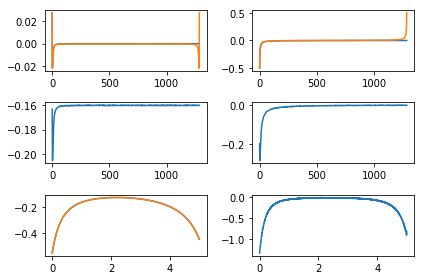

In [85]:
G_omega_orig = np.loadtxt("G_omega_9")
G_tau_orig = np.loadtxt("G_tau_9")
SE_omega_orig = np.loadtxt("selfenergy_9")

G_omega_FT = np.loadtxt("G_omega_out")
G_tau_FT = np.loadtxt("G_tau_out")
SE_tau_FT = np.loadtxt("SE_tau_out")

fig,axs = plt.subplots(3,2)
axs[0,0].plot(G_omega_orig[:,0], G_omega_orig[:,1])
axs[0,0].plot(G_omega_FT[:,0], G_omega_FT[:,1])

axs[0,1].plot(G_omega_orig[:,0], G_omega_orig[:,2])
axs[0,1].plot(G_omega_FT[:,0], G_omega_FT[:,2])

axs[1,0].plot(SE_omega_orig[:,0], SE_omega_orig[:,1])

axs[1,1].plot(SE_omega_orig[:,0], SE_omega_orig[:,2])

axs[2,0].plot(G_tau_orig[:,0], G_tau_orig[:,1])
axs[2,0].plot(G_tau_FT[:,0], G_tau_FT[:,1])

axs[2,1].plot(SE_tau_FT[:,0], SE_tau_FT[:,1])

plt.tight_layout()
plt.show()
